In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [204]:
# research article data

domestic_research = pd.read_csv('data/domestic_brazil_research.csv')
international_research = pd.read_csv('data/international_brazil_research.csv')
collaborative_research = pd.read_csv('data/collaboration_brazil_research.csv')

domestic_research = domestic_research[domestic_research['Publication Year'] < 2022]
international_research = international_research[international_research['Publication Year'] < 2022]
collaborative_research = collaborative_research[collaborative_research['Publication Year'] < 2022]

domestic_research = domestic_research.reset_index(drop=True)
international_research = international_research.reset_index(drop=True)
collaborative_research = collaborative_research.reset_index(drop=True)

# gdp data -> might not use
GDP_df = pd.read_csv('data/gdp_brazil.csv')

# deforestation data

deforestation_df = pd.read_csv('data/deforestation_data.csv')

## Pre-processing data

Aligning year ranges between the data

In [205]:
min_year = max([min(domestic_research['Publication Year']), min(international_research['Publication Year']), min(deforestation_df['year'])])

deforestation_df = deforestation_df[deforestation_df['year']  >= min_year]
domestic_research = domestic_research[domestic_research['Publication Year'] >= min_year]
international_research = international_research[international_research['Publication Year'] >= min_year]
GDP_df = GDP_df[GDP_df['Year']  >= min_year]

deforestation_df = deforestation_df.reset_index(drop=True)
domestic_research = domestic_research.reset_index(drop=True)
international_research = international_research.reset_index(drop=True)
GDP_df = GDP_df.reset_index(drop=True)

In [207]:
# dataframes to hold final predictor/response data

domestic_df = pd.DataFrame({'Year': np.arange(min_year, 2022), 'Deforestation': deforestation_df['deforestation_rate']})
international_df = pd.DataFrame({'Year': np.arange(min_year, 2022), 'Deforestation': deforestation_df['deforestation_rate']})

In [208]:
'''
from scipy.optimize import curve_fit

def sigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-b*(x-c))) + d

def bell_curve(x, a, b, c, d):
    return a * np.exp(-b*(x-c)**2) + d

def get_adjusted_citations(research_df):

    citations = np.array(research_df['Times Cited, All Databases'], dtype='int')
    pub_years = np.array(research_df['Publication Year'], dtype='int')
    paper_ages = 2022 - pub_years
    
    plt.scatter(paper_ages, citations, s=5)
    plt.xlabel('Paper age in years')
    plt.ylabel('Number of citations')
    plt.title('Paper Age vs. Citation count')
    
    
    paper_ages_test = np.linspace(0, max(paper_ages), 1000)
    
    try:
        popt_sig, pcov_sig = curve_fit(sigmoid, paper_ages, citations, bounds=(0, np.inf), maxfev=10000)
    except:
        popt_sig = [0,0,0,0]
        
    print(popt_sig)
    plt.plot(paper_ages_test, bell_curve(paper_ages_test, *popt_sig), label='fitted sigmoid')
        
    try:
        popt_bell, pcov_bell = curve_fit(bell_curve, paper_ages, citations, bounds=(0, np.inf), maxfev=10000)
    except:
        popt_bell = [0,0,0,0]
    
    print(popt_bell)
    plt.plot(paper_ages_test, bell_curve(paper_ages_test, *popt_bell), label='fitted bell curve')
    plt.legend()
    plt.ylim(0,100)
    
'''

"\nfrom scipy.optimize import curve_fit\n\ndef sigmoid(x, a, b, c, d):\n    return a / (1 + np.exp(-b*(x-c))) + d\n\ndef bell_curve(x, a, b, c, d):\n    return a * np.exp(-b*(x-c)**2) + d\n\ndef get_adjusted_citations(research_df):\n\n    citations = np.array(research_df['Times Cited, All Databases'], dtype='int')\n    pub_years = np.array(research_df['Publication Year'], dtype='int')\n    paper_ages = 2022 - pub_years\n    \n    plt.scatter(paper_ages, citations, s=5)\n    plt.xlabel('Paper age in years')\n    plt.ylabel('Number of citations')\n    plt.title('Paper Age vs. Citation count')\n    \n    \n    paper_ages_test = np.linspace(0, max(paper_ages), 1000)\n    \n    try:\n        popt_sig, pcov_sig = curve_fit(sigmoid, paper_ages, citations, bounds=(0, np.inf), maxfev=10000)\n    except:\n        popt_sig = [0,0,0,0]\n        \n    print(popt_sig)\n    plt.plot(paper_ages_test, bell_curve(paper_ages_test, *popt_sig), label='fitted sigmoid')\n        \n    try:\n        popt_bell

In [209]:
#get_adjusted_citations(domestic_research)

Processing article data to get research volume per year and citation metrics

In [416]:
# domestic research
volume_list = []
citation_count_list = []
for year in domestic_df['Year']:
    article_df_year = domestic_research[domestic_research['Publication Year'] == year]
    volume_list.append(len(article_df_year))
    citation_count_list.append(sum(article_df_year['Times Cited, All Databases']))
    
domestic_df['Paper Volume'] = volume_list
domestic_df['Total Citation Count'] = citation_count_list
domestic_df['Deforestation'] = deforestation_df['deforestation_rate']
domestic_df['GDP'] = GDP_df['GDP']
domestic_df['Avg Citation Count'] = domestic_df['Total Citation Count'] / domestic_df['Paper Volume']



# international research

volume_list = []
citation_count_list = []
for year in domestic_df['Year']:
    article_df_year = international_research[international_research['Publication Year'] == year]
    volume_list.append(len(article_df_year))
    citation_count_list.append(sum(article_df_year['Times Cited, All Databases']))

    
international_df['Paper Volume'] = volume_list
international_df['Total Citation Count'] = citation_count_list
international_df['Deforestation'] = deforestation_df['deforestation_rate']
international_df['Avg Citation Count'] = international_df['Total Citation Count'] / international_df['Paper Volume']

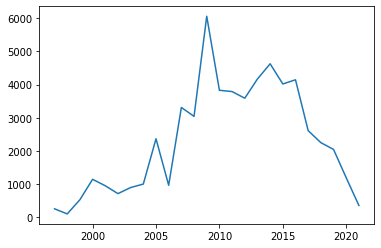

In [420]:
plt.plot(domestic_df['Total Citation Count'])

Attempt to decorrelate paper volume and time??

C:\Users\freja\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


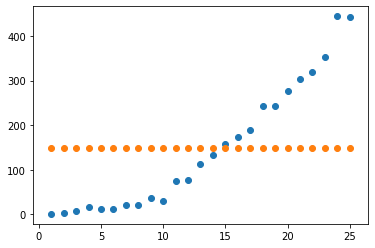

In [409]:
from scipy.optimize import curve_fit


def exp_func(x, a, b, c, d):
    return a * np.exp(b * (x-c)) + d

time = np.arange(1, len(domestic_df['Year']) + 1)
volume = np.asarray(domestic_df['Paper Volume'], dtype=float)

popt, pcov = curve_fit(exp_func, time, volume, maxfev=10000)

popt
plt.scatter(time, volume)
plt.scatter(time, exp_func(time, *popt))

Initial plots

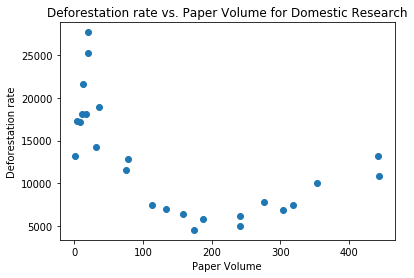

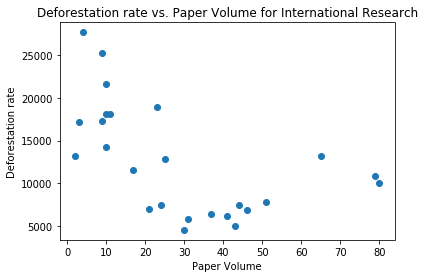

In [324]:
plt.scatter(domestic_df['Paper Volume'], domestic_df['Deforestation'])
plt.xlabel('Paper Volume')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Paper Volume for Domestic Research')
plt.show()

plt.scatter(international_df['Paper Volume'], international_df['Deforestation'])
plt.xlabel('Paper Volume')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Paper Volume for International Research')
plt.show()

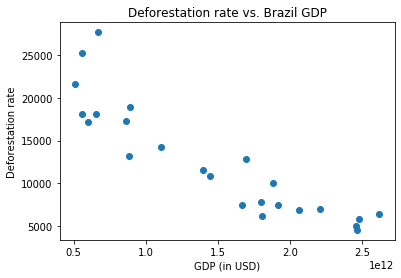

In [422]:
plt.scatter(domestic_df['GDP'], domestic_df['Deforestation'])
plt.xlabel('GDP (in USD)')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Brazil GDP')
plt.show()

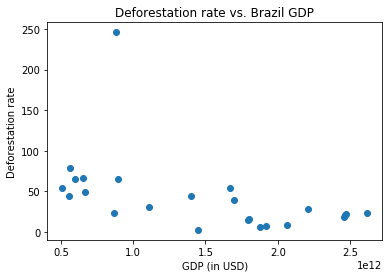

In [425]:
plt.scatter(domestic_df['GDP'], domestic_df['Avg Citation Count'])
plt.xlabel('GDP (in USD)')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Brazil GDP')
plt.show()

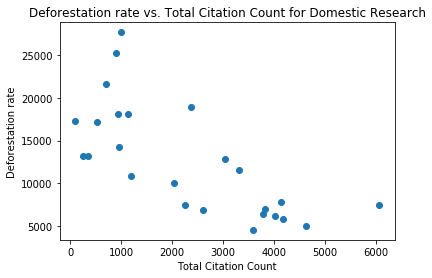

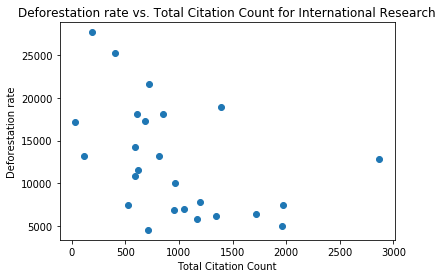

In [326]:
plt.scatter(domestic_df['Total Citation Count'], domestic_df['Deforestation'])
plt.xlabel('Total Citation Count')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Total Citation Count for Domestic Research')
plt.show()

plt.scatter(international_df['Total Citation Count'], international_df['Deforestation'])
plt.xlabel('Total Citation Count')
plt.ylabel('Deforestation rate')
plt.title('Deforestation rate vs. Total Citation Count for International Research')
plt.show()

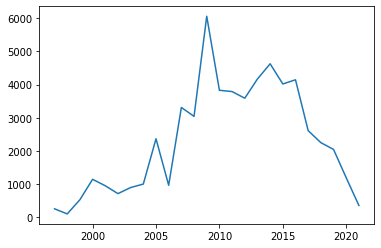

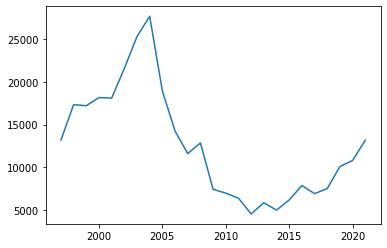

In [412]:
plt.plot(domestic_df['Year'], domestic_df['Total Citation Count'])
plt.show()
plt.plot(domestic_df['Year'], domestic_df['Deforestation'])

Making shifted variables

In [212]:
def get_shift(df, steps_back, min_year):
    
    df_shifted = pd.DataFrame({'Year': np.arange(min_year+steps_back, 2022)})
    
    deforestation_list = np.asarray(df['Deforestation'])
    deforestation_list = deforestation_list[steps_back:len(deforestation_list)]
    df_shifted['Deforestation'] = deforestation_list

    volume_list = np.asarray(df['Paper Volume'])
    volume_list = volume_list[0:len(volume_list)-steps_back]
    df_shifted[f'Paper Volume {steps_back} Year Prev'] = volume_list
    
    if df.columns.contains('GDP'):
        gdp_list = np.asarray(df['GDP'])
        gdp_list = gdp_list[0:len(gdp_list)-steps_back]
        df_shifted[f'GDP {steps_back} Year Prev'] = gdp_list
        
    
    return df_shifted

In [213]:
shift = 1

domestic_df_shift = get_shift(domestic_df, shift, min_year) 
international_df_shift = get_shift(international_df, shift, min_year)

'''
plt.scatter(domestic_df_shift[f'Paper Volume {shift} Year Prev'], domestic_df_shift['Deforestation'])
plt.xlabel('Paper Volume')
plt.ylabel('Deforestation rate')
plt.title(f'Deforestation rate vs. Paper Volume from {shift} Year Prev for Domestic Research')
plt.show()

plt.scatter(domestic_df_shift[f'GDP {shift} Year Prev'], domestic_df_shift['Deforestation'])
plt.xlabel('GDP in USD')
plt.ylabel('Deforestation rate')
plt.title(f'Deforestation rate vs. GDP from {shift} Year Prev')
plt.show()


plt.scatter(international_df_shift[f'Paper Volume {shift} Year Prev'], international_df_shift['Deforestation'])
plt.xlabel('Paper Volume')
plt.ylabel('Deforestation rate')
plt.title(f'Deforestation rate vs. Paper Volume from {shift} Year Prev for International Research')
plt.show()

'''

C:\Users\freja\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'
  del sys.path[0]


"\nplt.scatter(domestic_df_shift[f'Paper Volume {shift} Year Prev'], domestic_df_shift['Deforestation'])\nplt.xlabel('Paper Volume')\nplt.ylabel('Deforestation rate')\nplt.title(f'Deforestation rate vs. Paper Volume from {shift} Year Prev for Domestic Research')\nplt.show()\n\nplt.scatter(domestic_df_shift[f'GDP {shift} Year Prev'], domestic_df_shift['Deforestation'])\nplt.xlabel('GDP in USD')\nplt.ylabel('Deforestation rate')\nplt.title(f'Deforestation rate vs. GDP from {shift} Year Prev')\nplt.show()\n\n\nplt.scatter(international_df_shift[f'Paper Volume {shift} Year Prev'], international_df_shift['Deforestation'])\nplt.xlabel('Paper Volume')\nplt.ylabel('Deforestation rate')\nplt.title(f'Deforestation rate vs. Paper Volume from {shift} Year Prev for International Research')\nplt.show()\n\n"

# Model fitting

In [289]:
import statsmodels.api as sm
from scipy.interpolate import interp1d
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import patsy as pt

In [336]:
# normalizing volume -> don't want min. volume value to be zero
x = np.asarray(domestic_df['Paper Volume'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
domestic_df['Normalized_Volume'] = x_scaled[0:len(x_scaled)-1]

x = np.asarray(international_df['Paper Volume'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
international_df['Normalized_Volume'] = x_scaled[0:len(x_scaled)-1]

In [340]:
# normalizing total citation count
x = np.asarray(domestic_df['Total Citation Count'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
domestic_df['Normalized_Citations'] = x_scaled[0:len(x_scaled)-1]

x = np.asarray(international_df['Total Citation Count'])
x = np.append(x, [0]).reshape(-1,1) # adding extra zero point
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
# removing extra zero point
international_df['Normalized_Citations'] = x_scaled[0:len(x_scaled)-1]

## Polynomial regression

In [341]:
def calc_MSE_polynomial_fit(poly_order, X_train, X_val, y_train, y_val):
    if poly_order == 1:
        X_train_poly = X_train
        X_val_poly = X_val
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.fit_transform(X_val)
    
    # Fit the polynomial regression
    regr_poly = linear_model.LinearRegression()
    regr_poly.fit(X_train_poly, y_train)
    
    # Make predictions using the linear regression
    y_pred_poly_val = regr_poly.predict(X_val_poly)
    y_pred_poly_train = regr_poly.predict(X_train_poly)
    
    # Calculate the MSE for both the val and training sets
    MSE_val = mean_squared_error(y_val, y_pred_poly_val)
    MSE_train = mean_squared_error(y_train, y_pred_poly_train)
    
    return MSE_train, MSE_val

In [342]:
def poly_order_cv(X,y,k,poly_order_max):
    mses = pd.DataFrame()
    fold = 0

    kf = KFold(n_splits=k, shuffle=True, random_state=0) 
    for train_index, val_index in kf.split(X):
        # Separate each array into respective variables
        X_fold_train = X[train_index]
        y_fold_train = y[train_index]
        X_fold_val = X[val_index]
        y_fold_val = y[val_index]
    
        # Adding a column in the X matrices for the intercept
        X_fold_train = np.array(X_fold_train).reshape(-1, 1) 
        X_fold_val = np.array(X_fold_val).reshape(-1, 1) 

        # Calculate the MSE for each polynomial order
        MSE_val_array = []
        MSE_train_array = []
        
        for poly_order in range(1,poly_order_max+1):
            [MSE_train, MSE_val] = calc_MSE_polynomial_fit(poly_order, X_fold_train, X_fold_val, y_fold_train, y_fold_val)
            MSE_val_array.append(MSE_val)
            MSE_train_array.append(MSE_train) 
        mses[fold] = MSE_val_array
        fold = fold+1

    # Average the MSE across folds
    mses['mses_ave'] = mses.mean(axis=1)

    # Determine the minimum average MSE and the polynomial order where it occurs
    MSE_ave_val_min = min(mses.mses_ave)
    poly_order_MSE_ave_val_min = mses['mses_ave'].idxmin()+1
    
    return MSE_ave_val_min, poly_order_MSE_ave_val_min

In [343]:
def bootstrap_polynomial_sample_analysis(X,y, poly_order, x_array):
    
    x_bootstrap_min = min(X)
    x_bootstrap_max = max(X)
    
    X_reshape = np.array(X).reshape(-1, 1)

    # Generate features up to the specified polynomial order 
    if poly_order == 1:
        X_poly = X_reshape
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        X_poly = poly.fit_transform(X_reshape)
    
    # Fit the polynomial regression
    regr_poly = linear_model.LinearRegression()    
    regr_poly.fit(X_poly, y)
    
    # You do no want to extrapolate the bootstrapped regression beyond the range of the bootstrap data
    # For values below the lowest income in the bootstrap sample and above the highest income in the 
    # bootstrap sample, place NaN values. 
    entries_below_bootstrap_min = sum(x_array<x_bootstrap_min)
    y_pred_below_bootstrap_min = np.full(entries_below_bootstrap_min, np.nan)

    entries_above_bootstrap_max = sum(x_array>x_bootstrap_max)
    y_pred_above_bootstrap_max = np.full(entries_above_bootstrap_max, np.nan)

    # For entries within the bootstrap sample range, used your fitted regression to predict solar installation
    incomes_within_bootstrap_data =x_array[entries_below_bootstrap_min:(len(x_array) - entries_above_bootstrap_max)]
    #print(incomes_within_bootstrap_data)
    if poly_order == 1:
        incomes_within_bootstrap_data = incomes_within_bootstrap_data.reshape(-1, 1)
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        incomes_within_bootstrap_data = poly.fit_transform(incomes_within_bootstrap_data.reshape(-1, 1))
    y_pred_within_bootstrap_data_range = regr_poly.predict(incomes_within_bootstrap_data)

    # Concatenate the predicted solar installations for all three regions (below the lowest income in the bootstrap
    # sample, within the income data in the bootstrap sample, and above the highest income in the bootstrap sample)
    y_pred = np.concatenate((y_pred_below_bootstrap_min, y_pred_within_bootstrap_data_range, y_pred_above_bootstrap_max))

    return y_pred

In [344]:
def bootstrap_polynomial_analysis(df, variable_of_interest, response, poly_order_max, k):
    X = df[variable_of_interest]
    X = X.reset_index(drop = True)
    y = df[response]
    y = y.reset_index(drop = True)
    
    x_array = np.linspace(min(X), max(X), 100)
        
    # first determine the best polynomial order using cross-validation
    MSE_ave_val_min, poly_order_MSE_ave_val_min = poly_order_cv(X,y,k,poly_order_max)
    print('The average MSE of the valuation sets:', MSE_ave_val_min)
    print('This occured when using a polynomial of order:', poly_order_MSE_ave_val_min)
    
    # bootstrap analysis given this selected polynomial order
    y_pred_bootstrap = pd.DataFrame()
    for i in range(0,1000):
        df_bootstrap = df.sample(n=len(df), replace=True)
        X_bootstrap  = df_bootstrap[variable_of_interest]
        X_bootstrap  = X_bootstrap.reset_index(drop = True)
        y_bootstrap  = df_bootstrap[response]
        y_bootstrap  = y_bootstrap.reset_index(drop = True)

        y_pred = bootstrap_polynomial_sample_analysis(X_bootstrap, y_bootstrap, poly_order_MSE_ave_val_min, x_array)
        y_pred_bootstrap[i] = y_pred
        
    y_pred_bootstrap_summary = pd.DataFrame()
    y_pred_bootstrap_summary['median'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 50) for i in range(0, len(x_array))]  # median is 50th percentile
    y_pred_bootstrap_summary['95_CI_high'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 97.5) for i in range(0, len(x_array))]
    y_pred_bootstrap_summary['95_CI_low'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 2.5) for i in range(0, len(x_array))]

    
    return y_pred_bootstrap_summary, x_array

In [370]:
def plot_polynomial_bootstrap_analysis(domestic_df, international_df, variable_of_interest):
    
    response = 'Deforestation'
    poly_order_max = 5
    k = 5
    
    print('Domestic Research:')
    [y_bootstrap_summary_domestic, x_array_domestic] = bootstrap_polynomial_analysis(domestic_df, variable_of_interest, response, poly_order_max, k)
    print('International Research:')
    [y_bootstrap_summary_international, x_array_international] = bootstrap_polynomial_analysis(international_df, variable_of_interest, response, poly_order_max, k)

    plt.scatter(domestic_df[variable_of_interest], domestic_df[response], s=5)
    plt.scatter(international_df[variable_of_interest], international_df[response], s=5)
    plt.plot(x_array_international, y_bootstrap_summary_international['median'], 'm')
    plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = 'm', alpha = 0.5, label='domestic')
    plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], 'b')
    plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = 'b', alpha = 0.5, label='international')
    plt.xlabel('Research Volume as Papers per Year')
    plt.ylabel('Deforestation Rate (acres(?) per Year)')
    plt.title('Deforestation Rate vs. Research Volume for Domestic research')
    plt.legend()
    plt.show()

### Polynomial Bootstrap analysis for each variable

In [371]:
domestic_df.columns

Index(['Year', 'Deforestation', 'Paper Volume', 'GDP', 'Normalized_Volume',
       'Total Citation Count', 'Normalized_Citations'],
      dtype='object')

Domestic Research:
The average MSE of the valuation sets: 16606535.893389815
This occured when using a polynomial of order: 2
International Research:
The average MSE of the valuation sets: 19785039.67079469
This occured when using a polynomial of order: 2


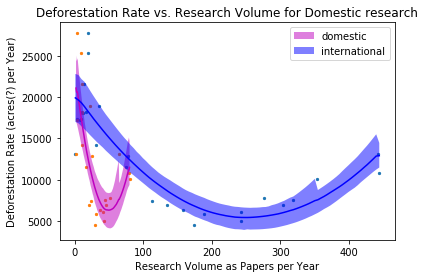

Domestic Research:
The average MSE of the valuation sets: 16606535.893384332
This occured when using a polynomial of order: 2
International Research:
The average MSE of the valuation sets: 19785039.67079497
This occured when using a polynomial of order: 2


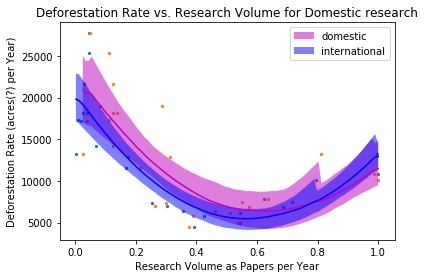

Domestic Research:
The average MSE of the valuation sets: 23208000.39789998
This occured when using a polynomial of order: 3
International Research:
The average MSE of the valuation sets: 33253324.69443388
This occured when using a polynomial of order: 2


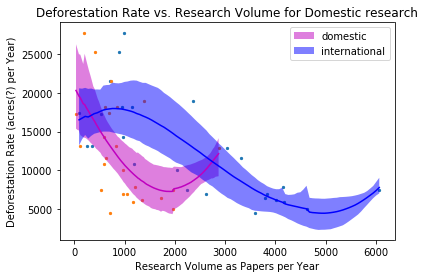

Domestic Research:
The average MSE of the valuation sets: 23208000.318029962
This occured when using a polynomial of order: 3
International Research:
The average MSE of the valuation sets: 33253324.694431257
This occured when using a polynomial of order: 2


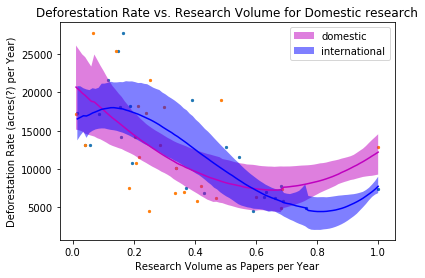

In [426]:
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Paper Volume')
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Normalized_Volume')
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Total Citation Count')
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Normalized_Citations')

Domestic Research:
The average MSE of the valuation sets: 96217039.87494901
This occured when using a polynomial of order: 2
International Research:
The average MSE of the valuation sets: 70068116.98095283
This occured when using a polynomial of order: 1


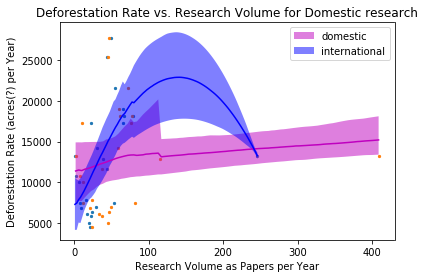

In [418]:
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Avg Citation Count')

### LOWESS

In [457]:
def lowess_cv(X, y, k, number_fractions_considered):
    mses = pd.DataFrame()
    fold = 0

    kf = KFold(n_splits=k, shuffle=True, random_state=0) 
    for train_index, val_index in kf.split(X):
        # Separate each array into respective variables
        X_fold_train = X[train_index]
        y_fold_train = y[train_index]
        X_fold_val = X[val_index]
        y_fold_val = y[val_index]

        MSE_array = []
        interval = 1/number_fractions_considered
        fractions_considered = np.arange(interval,1+interval,interval)
        for fraction in fractions_considered:
            # Fit LOWESS model
            lowess = sm.nonparametric.lowess(y_fold_train, X_fold_train, frac=fraction)
            lowess_x = list(zip(*lowess))[0]
            lowess_y = list(zip(*lowess))[1]
            f = interp1d(lowess_x, lowess_y, bounds_error=False) 
            y_pred = f(X_fold_val)
            
            # Calculate the mean squared error
            #   If the validation set has data points outside the income range of the training set, 
            #   an error would occur in the calculation of the MSE. Therefore, validation points outside
            #   the training range are removed for this calculation
            if np.isnan(y_pred).any()==True:
                y_comparison = pd.DataFrame({'y_pred': np.array(y_pred), 'y_fold_val': np.array(y_fold_val)}, columns=['y_pred', 'y_fold_val'])
                y_comparison = y_comparison.dropna()
                MSE = mean_squared_error(y_comparison.y_fold_val, y_comparison.y_pred) 
                #if len(y_comparison) > 0 else 100
            else:
                MSE = mean_squared_error(y_fold_val, y_pred)
            MSE_array.append(MSE)

        mses[fold] = MSE_array
        fold = fold+1

    # Average the MSE across folds
    mses['mses_ave'] = mses.mean(axis=1)

    # Determine the minimum average MSE and with which fraction (span) does it occur
    MSE_ave_min = min(mses.mses_ave)
    span_MSE_ave_min_index = mses['mses_ave'].idxmin()
    span_MSE_ave_min = fractions_considered[span_MSE_ave_min_index]
    
    return MSE_ave_min, span_MSE_ave_min

In [458]:
def bootstrap_lowess_sample_analysis(X,y, fraction, x_array):
    x_bootstrap_min = min(X)
    x_bootstrap_max = max(X)
    
    # Fit LOWESS model
    lowess = sm.nonparametric.lowess(y, X, frac=fraction)
    lowess_x = list(zip(*lowess))[0]
    lowess_y = list(zip(*lowess))[1]
    f = interp1d(lowess_x, lowess_y, bounds_error=False)
    
    # You do no want to extrapolate the bootstrapped regression beyond the range of the bootstrap data
    # For values below the lowest income in the bootstrap sample and above the highest income in the 
    # bootstrap sample, place NaN values. 
    entries_below_bootstrap_min = sum(x_array<x_bootstrap_min)
    y_pred_below_bootstrap_min = np.full(entries_below_bootstrap_min, np.nan)

    entries_above_bootstrap_max = sum(x_array>x_bootstrap_max)
    y_pred_above_bootstrap_max = np.full(entries_above_bootstrap_max, np.nan)

    # For entries within the bootstrap sample range, used your fitted regression to predict solar installation
    incomes_within_bootstrap_data =x_array[entries_below_bootstrap_min:(len(x_array) - entries_above_bootstrap_max)]
    y_pred_within_bootstrap_data_range = f(incomes_within_bootstrap_data)

    # Concatenate the predicted solar installations for all three regions (below the lowest income in the bootstrap
    # sample, within the income data in the bootstrap sample, and above the highest income in the bootstrap sample)
    y_pred = np.concatenate((y_pred_below_bootstrap_min, y_pred_within_bootstrap_data_range, y_pred_above_bootstrap_max))

    return y_pred

In [459]:
def bootstrap_lowess_analysis(df,variable_of_interest,response,k,number_fractions_considered):
    
    X = df[variable_of_interest]
    X = X.reset_index(drop = True)
    y = df[response]
    y = y.reset_index(drop = True)
    
    x_array = np.linspace(min(X), max(X), 100)
    
    # determining optimal span using cross-validation
    MSE_ave_val_min, span_MSE_ave_min = lowess_cv(X, y, k, number_fractions_considered)
    print('The average MSE across the folds when using optimal span:', MSE_ave_val_min)
    print('The optimal span:', span_MSE_ave_min)
    
    # now performing bootstrap analysis for 100 samples given this optimal span value
    y_pred_bootstrap = pd.DataFrame()
    for i in range(0,100):        
        # getting bootstrap samples
        df_bootstrap = df.sample(n=len(df), replace=True)
        X_bootstrap  = df_bootstrap[variable_of_interest]
        X_bootstrap  = X_bootstrap.reset_index(drop = True)
        y_bootstrap  = df_bootstrap[response]
        y_bootstrap  = y_bootstrap.reset_index(drop = True)
        
        # getting predicted y-values for bootstrap sample and putting them in the dataframe
        y_pred = bootstrap_lowess_sample_analysis(X_bootstrap, y_bootstrap, span_MSE_ave_min, x_array)
        y_pred_bootstrap[i] = y_pred
    
    # computing statistics on the bootstrap analysis (median, confidence intervals)
    y_pred_bootstrap_summary = pd.DataFrame()
    y_pred_bootstrap_summary['median'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 50) for i in range(0, len(x_array))]  # median is 50th percentile
    y_pred_bootstrap_summary['95_CI_high'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 97.5) for i in range(0, len(x_array))]
    y_pred_bootstrap_summary['95_CI_low'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 2.5) for i in range(0, len(x_array))]
        
    
    return y_pred_bootstrap_summary, x_array

In [476]:
def plot_lowess_bootstrap_analysis(domestic_df, international_df, variable_of_interest):
    
    response = 'Deforestation'
    number_fractions_considered = 10
    k = 5
    
    print('Domestic Research:')
    [y_bootstrap_summary_domestic, x_array_domestic] = bootstrap_lowess_analysis(domestic_df, variable_of_interest, response, k, number_fractions_considered)
    print('International Research:')
    [y_bootstrap_summary_international, x_array_international] = bootstrap_lowess_analysis(international_df, variable_of_interest, response, k, number_fractions_considered)

    plt.scatter(domestic_df[variable_of_interest], domestic_df[response], s=5, color='b')
    plt.scatter(international_df[variable_of_interest], international_df[response], s=5, color='m')
    plt.plot(x_array_international, y_bootstrap_summary_international['median'], 'm')
    plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = 'm', alpha = 0.5, label='domestic')
    plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], 'b')
    plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = 'b', alpha = 0.5, label='international')
    plt.xlabel(variable_of_interest)
    plt.ylabel('Deforestation Rate (km^2(?) per Year)')
    plt.title(f'Deforestation Rate vs. {variable_of_interest}')
    plt.legend()
    plt.show()

In [477]:
international_df['Normalized_Citations']

0     0.285216
1     0.238842
2     0.010809
3     0.213040
4     0.297768
5     0.251395
6     0.140516
7     0.065900
8     0.484310
9     0.205370
10    0.216876
11    1.000000
12    0.686192
13    0.364714
14    0.600767
15    0.249303
16    0.406206
17    0.682706
18    0.467922
19    0.418759
20    0.334379
21    0.183054
22    0.337517
23    0.207113
24    0.039052
Name: Normalized_Citations, dtype: float64

Domestic Research:
The average MSE across the folds when using optimal span: 23112518.828999005
The optimal span: 0.30000000000000004


C:\Users\freja\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


International Research:
The average MSE across the folds when using optimal span: 36794416.85714433
The optimal span: 1.0


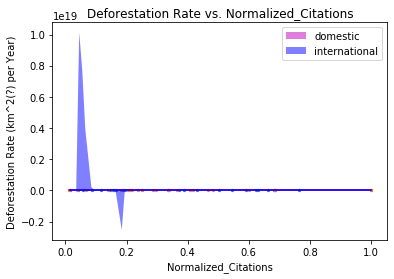

In [478]:
plot_lowess_bootstrap_analysis(domestic_df, international_df, 'Normalized_Citations')

Domestic Research:


C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\freja\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\freja\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_low

The average MSE across the folds when using optimal span: 6084964.460462941
The optimal span: 0.30000000000000004


C:\Users\freja\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


International Research:


C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\freja\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\freja\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\freja\Anaconda3\lib\s

The average MSE across the folds when using optimal span: 15585424.192178642
The optimal span: 0.8


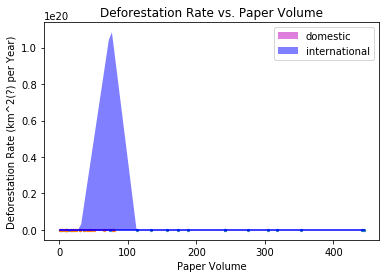

In [456]:
plot_lowess_bootstrap_analysis(domestic_df, international_df, 'Paper Volume')
